# Creating a Network Graph of Twitter Hashtags <br>with Python-Selenium, NetworkX and Gephi

> *by Sebastian Einar Røkholt, April 15th 2021*

---

This project was inspired by an assignment given as part of the course *INFO215: Web Science* at the University of Bergen. <br>

The notebook will show how I created a network graph to visualize how different hashtags trending on Twitter are related to each other. The hashtags were obtained by scraping Twitter with the Python packages *Selenium* and *BeautifulSoup* using a breadth-first-search based algorithm, which also added the hashtags to the network graph with the graphing package *NetworkX*.

I started the crawl from two different queries: `#crypto` and `#AI`. This was mainly because I wanted to visualize how these two concepts were related to each other on a popular social network. I limited the crawl to search for 40 + 40 unique hashtags, collecting as many hashtags related to each of these as were rendered on the Twitter search page by default (without scrolling). Therefore, the results I got here were highly dependent on the date and time of when the crawl was executed (15.04.2021 at 17:41, GMT+2). 

The discovered hashtags were added to the network graph with a single attribute `start` which detailed which node the crawl had started from. I then coloured each node based on the `start` attribute; Orange for `#crypto` and light blue for `#AI`. An edge between two hashtags represent that they were found on the same search page, not necessarily in the same tweet. 

Finally, I decided to export the network to *GraphML* format and then import it to the network graph visualization software *Gephi*. Since NetworkX isn't really designed for visualizing graphs, Gephi provided the additional features needed in order to create the pretty graph displayed at the end of this notebook. Keep in mind that this graph was created in Gephi and only rendered as an image here in Jupyter. While the NetworkX graph is coloured by starting node, the Gephi graph is colored by modularity so that the groupings and connections between groups are highlighted. 

---


### Notebook Index:
1. [**Inital Notebook Setup**](#setup)<br>
2. [**Crawling Twitter and Creating the Graph** with Selenium, BeautifulSoup and NetworkX](#crawling)<br>
3. [**Graph Visualization** with NetworkX and Matplotlib](#plotting)<br>
4. [**Graph Visualization** with Gephi](#gephi)

*PS: Index links only work in Jupyter Notebook.*

<br>

---



### <a id="setup"></a>1) Inital notebook setup

In [1]:
# Install dependencies 
import sys
!{sys.executable} -m pip install selenium

# import packages
import re
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import randint, shuffle
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import InvalidArgumentException, TimeoutException

### <a id="crawling"></a>2) Crawling Twitter and creating the graph

In [2]:
# Set options for Selenium
chrome_options = Options()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(executable_path=r'drivers\chromedriver', options=chrome_options)

In [3]:
# Create a  NetworkX Graph instance
G = nx.Graph()

# Add the starting hashtags to graph. New hashtags found will be added automatically
G.add_node('crypto', start="crypto")
G.add_node('ai', start="ai")

# Set start attribute for nodes found during crawling. This attribute is reset to 'oslo' halfway
start = 'crypto'

In [4]:
# Create a search queue for crawling hashtags with breadth first search
search_queue = ['crypto']
searched = []

# Crawling loop.
# Every discovered hashtag is added to the search queue and the network graph
while search_queue and len(searched) < 80:
    # When 40 hashtags have been followed, switch starting url to '#ai'
    if len(searched) == 40:
        # Reset the search queue
        print("\nResetting queue!\n")
        search_queue = ['ai']
        start = 'ai'
        
    # Select the next hashtag from the queue and add it to the new url to be searched
    current_hashtag = search_queue.pop(0)
    print(f"Crawling #{current_hashtag}...")
    url = 'https://twitter.com/search?q=%23' + current_hashtag

    # Add the hashtag to the list of searched hashtags
    searched.append(current_hashtag)

    # Access the twitter page
    try:
        driver.get(url)

    except InvalidArgumentException:
        print(f"Could not retrieve this page: {url}\nTrying another!")
        url = 'https://twitter.com/hashtag/programming?src=hashtag_click&f=live'
        driver.get(url)

    # Wait for the tweets to load before scraping the page
    try:
        tweets = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//div[@data-testid="tweet"]')))
    except TimeoutException:
        print(f'Timed out! Could not find any tweets on this page: {url} \nReturning... ')

    # Scrape the hashtags from the page and add them to the graph and the queue
    try:
        # Get the Twitter page HTML content
        bs = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Get all new and unique hashtags referenced on the page
        hashtag_anchors = bs.find_all('a', {'href': re.compile('hashtag/')})
        page_hashtags = list(set([anchor.get_text().lower() for anchor in hashtag_anchors]))
        
        # Shuffle the list of hashtags randomly
        np.random.shuffle(page_hashtags)

        # loop through the hashtags on the page
        for tags in page_hashtags:
            # Only get the lowercased query, not the hashbang character
            hashtag = tags[1:]
            # Found hashtags must be new and not empty
            if hashtag not in search_queue and hashtag not in searched and hashtag != '':
                # Add it to the search queue
                search_queue.append(hashtag)
                if hashtag not in G.nodes():
                    # Add it to the graph
                    G.add_node(hashtag, start=start)
                # Add an edge between the searched hastag and the found hashtag
                G.add_edge(current_hashtag, hashtag)

    except AttributeError:
        print(f'Could not find any hashtags on this page: {url}')

print("\nCrawl completed!")

# Close the Selenium driver
driver.close()

Crawling #crypto...
Crawling #coinmetro...
Crawling #fiatgateway...
Crawling #coinbase...
Crawling #giveaway...
Crawling #cryptocurrency...
Crawling #airdrop...
Crawling #airdrops...
Crawling #smartcryptoschool...
Crawling #smartliquidity...
Crawling #exchange...
Crawling #bitcoin...
Crawling #vergecurrency...
Crawling #mandalaex...
Crawling #free...
Crawling #blockchain...
Crawling #elastum...
Crawling #trade...
Crawling #ethereum...
Crawling #mdx...
Crawling #cryptocurrencyexchange...
Crawling #investor...
Crawling #dogecoinrise...
Crawling #dogecoin...
Crawling #eth...
Crawling #btc...
Crawling #chrysalis...
Crawling #sustainable...
Crawling #dyor...
Crawling #iota...
Crawling #buharimustgo...
Crawling #feeless...
Crawling #bnb...
Crawling #airdropinspector...
Crawling #safedream...
Crawling #bsc...
Crawling #tothemoon...
Crawling #binancesmartchain...
Crawling #cryptocurrencies...
Crawling #airswap...

Resetting queue!

Crawling #ai...
Crawling #startups...
Crawling #explainability

In [5]:
# Printing some information about the graph
print(f"Total number of nodes in the graph: {G.number_of_nodes()}")
print(f"Total number of edges in the graph: {G.number_of_edges()}")
list_degrees = [degree[1] for degree in G.degree()]  # Calculate degrees for each node
print(f"The node with the highest degree has {max(list_degrees)} edges")
print(f"Total number of hashtags crawled: {len(searched)}")

Total number of nodes in the graph: 509
Total number of edges in the graph: 523
The node with the highest degree has 27 edges
Total number of hashtags crawled: 80


### <a id="plotting"></a>3)  Plotting the network graph with NetworkX and Matplotlib

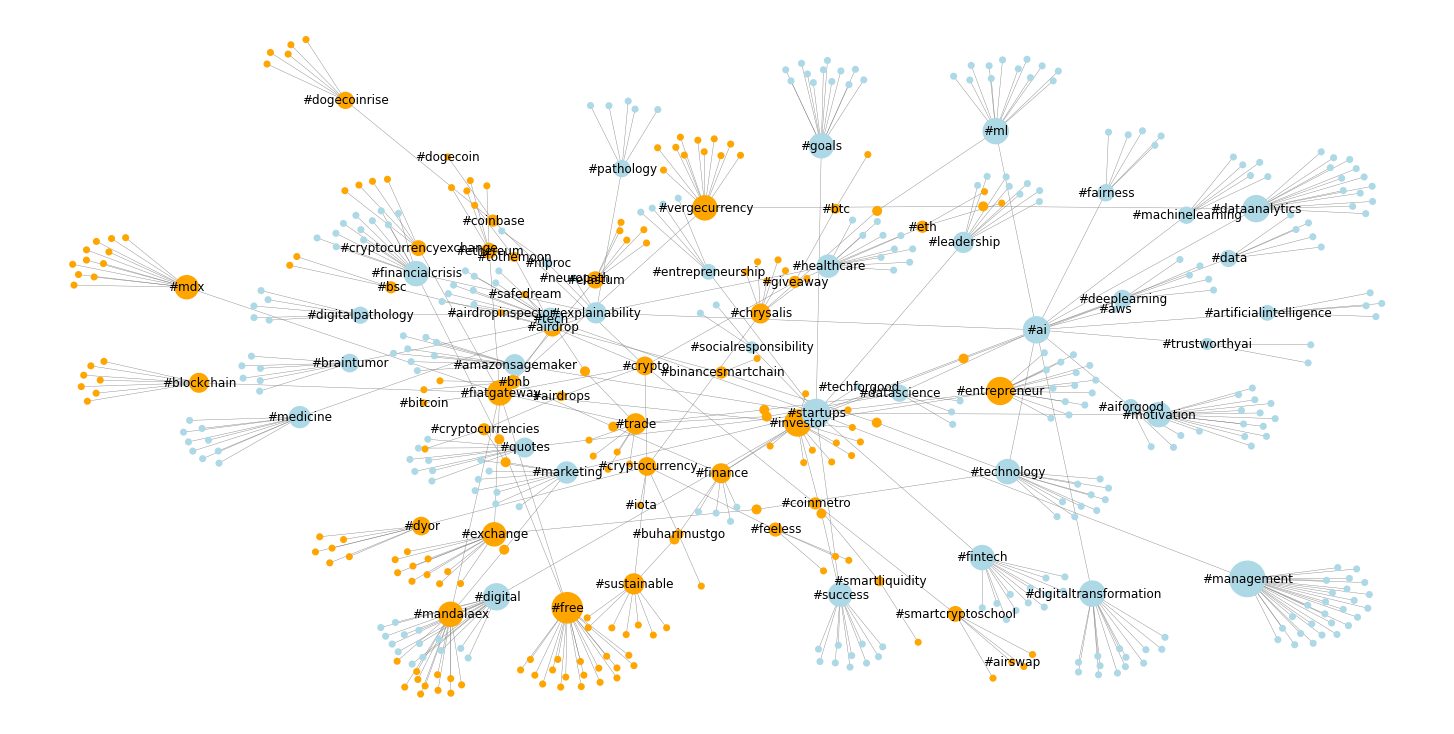

In [6]:
# Set plot size
plt.figure(figsize=(20, 10))

# Set color by the starting hashtag
n_color = []
for node in G.nodes(data=True):
    if node[1]['start'] == "crypto":
        n_color.append("orange")
    else:
        n_color.append("lightblue")

# Recalculate degrees for each node
degrees = G.degree()

# Calculate the size parameter as a function of node degree
n_size = np.asarray([degrees[n]*50 for n in G.nodes()])

# Set options
options = {
    "node_color": n_color,
    "node_size": n_size,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.4,
    "with_labels": True, 
    "labels": {hashtag: f"#{hashtag}" for hashtag in searched}
}

# Calculate node positioning with the Fruchterman-Reingold formula
pos = nx.fruchterman_reingold_layout(G, seed=42)

# Construct the graph
nx.draw(G, pos, **options)

# Write the graph to GraphMl for future Gephi plotting
nx.write_graphml(G, "hashtags-crypto-ai-network-with-labels.graphml")

# Display the NetworkX graph
plt.show()

### <a id="gephi"></a>4) Graph Visualization with Gephi

Gephi provides a lot more functionality for creating pretty graph visualizations. After importing the GraphML-version to Gephi, it was simple to create the following graph. I decided to colour the nodes based on *modularity*, a metric which measures the to what extent a network or part of the network can be split into modules (also called groups, clusters or communities). Similarly to the graph above, I also chose to only include the labels for the hashtags that were used as starting point for a new crawl.

<br>

![Visualizing the Network Graph with Gephi](https://raw.githubusercontent.com/SebastianRokholt/Data-Science-Projects/master/img/shortest-path.png?token=AO63X7WA5YIBWMSNJOYFQXLAQG2RI)
<br>



### <a id="conclusion"></a> 5) Conclusion

When analyzing the two visualizations of the network graphs, we can conclude that `#AI` and `#crypto` are highly connected. Considering that the crawler performed a breadth-first search, it's actually quite surprising that these two concepts were connected at all in the graph - despite the fact that both of these concepts are related to technology. 

![shortest path between AI and Crypto](https://raw.githubusercontent.com/SebastianRokholt/Data-Science-Projects/master/img/shortest-path.png?token=AO63X7WA5YIBWMSNJOYFQXLAQG2RI)

The path `#ai` --> `#technology` --> `#NFTs` --> `#binancesmartchain` --> `#airdrop` --> `#crypto` show that there are 5 edges connecting the two starting tags, which implies that they are referred to in the same social circles. It is also interesting that the crawler discovered tags with a very high degree of modularity, such as `#management`. This tag is almost completely isolated in the graph, with only a single edge connecting it to the rest. 